<a href="https://colab.research.google.com/github/amiranissian/ai-ml-principles-exercises/blob/main/ML-training/activeloop-deeplake/digit_classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and explore the dataset
The dataset used in this exersice is a digit recognition dataset from the *ActiveLoop* dataset hub.

In [51]:
!pip install deeplake

import numpy as np
import deeplake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
ds_train = deeplake.load("hub://activeloop/mnist-train")
ds_test = deeplake.load("hub://activeloop/mnist-test")

hub://activeloop/mnist-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/mnist-train
hub://activeloop/mnist-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/mnist-test


In [4]:
len(ds_train),len(ds_test)

(60000, 10000)

In [5]:
ds_test.tensors.keys()

dict_keys(['images', 'labels'])

In [6]:
ds_test.images.shape

(10000, 28, 28)

In [10]:
#download all images
ds_train.images.numpy().reshape((len(ds_train), -1)).shape

(60000, 784)

In [ ]:
ds_test.labels.shape

In [ ]:
ds_test.labels.info

In [ ]:
from PIL import Image

i = 100
print(ds_test.labels[i])
Image.fromarray(ds_test.images[i].numpy(), "L").resize((100, 100), resample=Image.NEAREST)

In [ ]:
# Show the maximum value in any of the first 100 image in the dataset
np.max(ds_test.images[:100])

# Train a model

* Train a SVM classifier
* Evaluate the classifier

In [42]:
#download and flatten the Images
X_train = ds_train.images.numpy().reshape((len(ds_train), -1))
X_test = ds_test.images.numpy().reshape((len(ds_test), -1))

In [43]:
#download lables
y_train = ds_train.labels.numpy()
y_test = ds_test.labels.numpy() 

In [44]:
X_train.shape

(60000, 784)

In [45]:
X_test.shape

(10000, 784)

In [53]:
import numpy as np
train_idx = np.random.choice(len(y_train), replace=False, size=10_000)
train_idx = np.random.choice(len(y_train), replace=False, size=10_000)

[6]


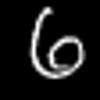

In [54]:
from PIL import Image
print(y_test[100])
Image.fromarray(X_test[100].reshape((28,28)), "L").resize((100,100))


In [ ]:
# Randomly select 10k images to use for training
train_idx = np.random.choice(range(len(ds_train)), replace=False, size=10_000)

In [ ]:
# Prefetch the datasets to RAM and reshape to flatten the images
# Note that we could index the training samples using train_idx before
# calling the numpy() method to download them, this would cause us to only
# download the images we are actually going to use. In this particular case
# where the images are tiny it is however faster to first download the full
# dataset and then slice it, this is due to the chunking of downloads in deeplake.
X_train = ds_train.images.numpy().reshape((len(ds_train), -1))[train_idx]
X_test = ds_test.images.numpy().reshape((len(ds_test), -1))
y_train = ds_train.labels[train_idx.tolist()].numpy().flatten()
y_test = ds_test.labels.numpy().flatten()

In [55]:
from sklearn import svm

In [58]:
model = svm.SVC()
model.fit(X_train[train_idx], y_train[train_idx])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [57]:
model = svm.SVC()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [59]:
# Predict the first ten samples from the test dataset
model.predict(X_test[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint32)

In [62]:
# Show the first ten ground truth values from the test dataset
y_test[0:10].flatten()

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint32)

In [63]:
# Compare predicted and true
model.predict(X_test[0:10]) == y_test[0:10]

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False,  True, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False,  True, False, False,
        False],
       [False, False,  True, False, False,  True, False, False, False,
        False],
       [False, False, False, False,  True, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
         True]])

In [64]:
from sklearn import metrics

predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.95      0.96      0.96       982
           5       0.96      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



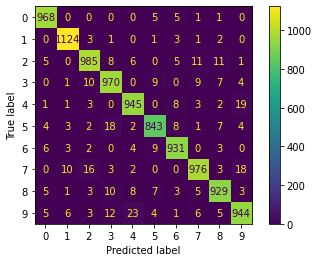

In [65]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)